In [106]:
from embedding import TokenizerEmbedder
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [68]:
embedder = TokenizerEmbedder('bpe.pckl', 'vectors.tsv', 'metadata.tsv')
embedder

In [101]:
df = pd.read_csv('supersim-superlim/supersim-superlim-relatedness_test.tsv', sep='\t')
df.head()

,word_1,word_2,a1,a2,a3,a4,a5,label
0,bråka,rättfärdiga,3,0,2,0,7,2.4
1,elev,president,1,0,0,0,1,0.4
2,vinna,lyckas,5,8,9,8,10,8.0
3,låtsas,porträttera,3,0,0,0,0,0.6
4,typ,snäll,1,0,0,0,0,0.2


In [70]:
embedder._inverse_tokens

{0: '<pad>',
 1: '<oov>',
 2: '$',
 3: ')',
 4: '!',
 5: 'k',
 6: ']',
 7: '^',
 8: ' ',
 9: '8',
 10: 'c',
 11: 'p',
 12: 'l',
 13: '.',
 14: '/',
 15: '"',
 16: 'r',
 17: 'v',
 18: 'å',
 19: '_',
 20: 'z',
 21: 'x',
 22: '@',
 23: '\\',
 24: "'",
 25: 't',
 26: '#',
 27: '~',
 28: '*',
 29: '1',
 30: '<',
 31: 'y',
 32: '=',
 33: '&',
 34: 'b',
 35: 'n',
 36: 'f',
 37: 'q',
 38: 'e',
 39: 'a',
 40: ':',
 41: '(',
 42: 'u',
 43: '+',
 44: '>',
 45: '6',
 46: 's',
 47: '?',
 48: '5',
 49: '4',
 50: '-',
 51: '}',
 52: 'ä',
 53: '[',
 54: 'm',
 55: '9',
 56: '%',
 57: 'd',
 58: '{',
 59: 'o',
 60: 'w',
 61: '`',
 62: 'ö',
 63: ';',
 64: '3',
 65: ',',
 66: 'j',
 67: '2',
 68: 'i',
 69: '0',
 70: 'h',
 71: 'g',
 72: '7',
 73: '|',
 74: '</w>',
 75: '[END]',
 76: 'n</w>',
 77: 'r</w>',
 78: 'de',
 79: 't</w>',
 80: 'a</w>',
 81: 's</w>',
 82: 'en</w>',
 83: 'an',
 84: '.</w>',
 85: 'in',
 86: 'st',
 87: 'er',
 88: 'ar',
 89: 'e</w>',
 90: 'i</w>',
 91: ',</w>',
 92: 'd</w>',
 93: 'll',
 9

In [90]:
a = np.array(embedder[embedder['far</w>']][1])
b = np.array(embedder[embedder['dotter</w>']][1])
1-np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
# np.linalg.norm(a - b)

0.7062240465163453

In [102]:
i = 0
res = []
corpus = []
targets = []
for idx, row in df.iterrows():
    word1 = row[0]
    word2 = row[1]
    target = row[7]
    corpus.append(word1)
    corpus.append(word2)
    targets.append(target)

word_embeddings = embedder(corpus)
for idx in range(0, len(word_embeddings), 2):
    word1_embedding, word2_embedding = word_embeddings[idx], word_embeddings[idx+1]
    if len(word1_embedding) > 2 or len(word2_embedding) > 2:
        continue
    word1_embedding = word1_embedding[0]
    word2_embedding = word2_embedding[0]
    target = targets[idx//2]
    cosine = np.dot(word1_embedding,word2_embedding)/(np.linalg.norm(word1_embedding)*np.linalg.norm(word2_embedding))
    res.append((target, cosine))

res

100%|██████████| 9998/9998 [00:17<00:00, 579.14it/s] 


[(0.4, 0.17775769832209384),
 (8.0, 0.139155074014976),
 (7.6, 0.0974962504514577),
 (3.8, 0.10621959229683646),
 (3.0, 0.1544299094210136),
 (1.4, 0.16321536722283844),
 (3.4, 0.11627240759991106),
 (1.4, 0.08241861285275456),
 (4.8, 0.10457193491543026),
 (9.4, 0.2937759534836547),
 (0.4, 0.07832124403116958),
 (0.2, 0.043396053010914856),
 (9.8, 0.24127272302716668),
 (1.0, 0.14937490754372487),
 (5.2, 0.08052777489407544),
 (5.0, 0.1510690104281562),
 (9.6, 0.0972604483551154),
 (0.8, 0.21341179159822218),
 (3.4, 0.12473549848881207),
 (7.8, 0.19506452742510882),
 (2.2, 0.15811899623278375),
 (0.4, 0.1858574063513825),
 (6.4, 0.3267489564436954),
 (1.8, 0.13676947814893445),
 (8.2, 0.2370959395190654),
 (9.4, 0.15065740193293606),
 (7.6, 0.1447693263191693),
 (2.2, -0.04274025377323483),
 (0.2, 0.03660421636575992),
 (2.4, 0.06094164352959307),
 (9.4, 0.33792460243438166),
 (0.8, 0.1186120023410096),
 (9.2, 0.25102582320943506),
 (9.2, 0.11240211931500274),
 (9.6, 0.210913241858469

In [98]:
len(res)

241

In [112]:
lr = LinearRegression()
lr.fit(np.array(res)[:,0].reshape(-1, 1), np.array(res)[:,1].reshape(-1, 1))
print(lr.coef_, lr.intercept_)

[[0.01072371]] [0.10145088]


Text(0.5, 1.0, 'Cosine Similarity Score vs Manually Labeled Score\nfor SuperSim v1 Word Relatedness Data Set')

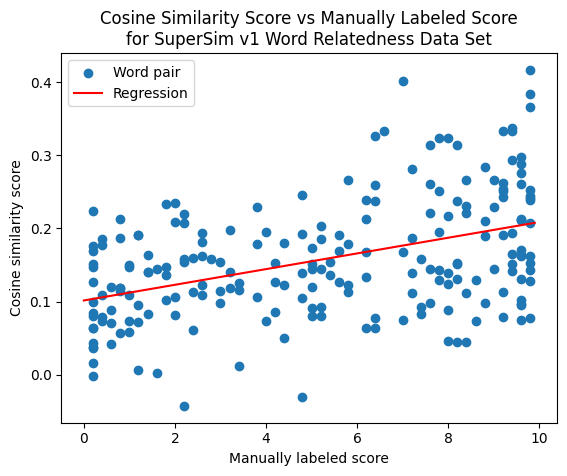

In [125]:

plt.scatter(np.array(res)[:,0], np.array(res)[:,1])
plt.plot(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1)*lr.coef_[0] + lr.intercept_[0], color='red')
plt.legend(['Word pair', 'Regression'])
plt.xlabel('Manually labeled score')
plt.ylabel('Cosine similarity score')
plt.title('Cosine Similarity Score vs Manually Labeled Score\nfor SuperSim v1 Word Relatedness Data Set')

In [104]:
stats.pearsonr(np.array(res)[:,0], np.array(res)[:,1])

PearsonRResult(statistic=0.4394119091751781, pvalue=1.6261175730287994e-11)